# <center>Построение пуассоновской регрессии

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Чтение и подготовка данных

Рассмотрим данные о количестве велосипедистов. Количество велосипедистов зависит от погодных условий в рассматриваемый день: чем хуже погода, тем меньше желающих. В качестве признаков возьмем:
- максимальную температуру в рассматриваемый день (F);
- минимальную температуру в рассматриваемый день (F);
- количество осадков.

In [2]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [3]:
data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


Целевая переменная &ndash; `'BB_COUNT'` &ndash; содержит только целые положительные числа, что должно быть учтено при выборе предсказательной модели.

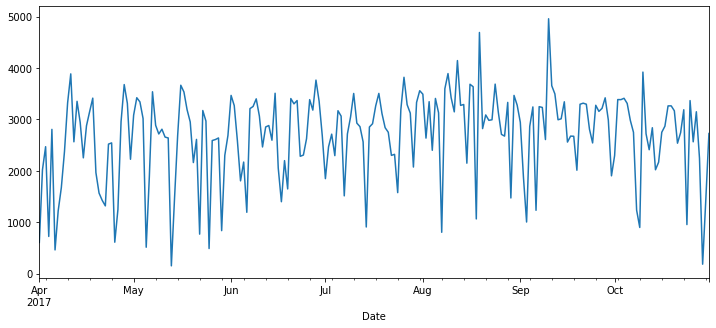

In [4]:
data['BB_COUNT'].plot(figsize=(12,5))
plt.show()

Кроме указанных факторов, количество велосипедистов может зависеть от дня недели: в выходные количество желающих больше, нежели в будни. Также может оказаться важным месяц. Добавим столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение:

In [5]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month
data['const'] = 1

In [6]:
data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,DAY_OF_WEEK,MONTH,const
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,5,4,1
2017-04-02,62.1,41.0,0.00,2021,6,4,1
2017-04-03,63.0,50.0,0.03,2470,0,4,1
2017-04-04,51.1,46.0,1.18,723,1,4,1
2017-04-05,63.0,46.0,0.00,2807,2,4,1


Данные переменные являются категориальными.

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход исходные данные $(X,y)$ и параметры модели $\theta$. Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
    
<ul>2. Определите аналогичную функцию, которая возвращает значение функционала качества пуассоновской регрессии.</ul>  
    
<ul>3. Обучите обе модели с помощью функции minimize из SciPy. Сравните качество аппроксимации моделей. Метрикой качества выберите среднюю абсолютную ошибку.</ul>    
 
<ul>4. Отобразите на графике исходный ряд и результаты аппроксимации линейной и пуассоновской регрессиями.</ul>
<p></p>   

<p></p>
</div>

In [7]:
from scipy.optimize import minimize

In [8]:
X = data.drop('BB_COUNT', axis=1)
y = data['BB_COUNT']

**MAE**

In [9]:
def mae(X, y, theta):
    return np.mean(np.abs(y - np.dot(X, theta)))

In [10]:
opfunc = lambda theta: mae(X, y, theta)

optimization = minimize(opfunc, [0 for _ in range(6)])

print(optimization)
linear_theta = optimization.x

      fun: 434.96888038367257
 hess_inv: array([[ 64.97666991, -69.30803095,  55.89860769, -51.94469232,
         -7.36430245,  11.77645236],
       [-69.30803095,  74.14991076, -56.69122951,  53.2635421 ,
          7.25211331, -12.86467275],
       [ 55.89860769, -56.69122951,  98.62364454, -76.38509794,
        -13.17009322,   3.58517359],
       [-51.94469232,  53.2635421 , -76.38509794,  63.73972212,
         11.17945039,  -5.82705586],
       [ -7.36430245,   7.25211331, -13.17009322,  11.17945039,
          2.71460404,  -0.83022352],
       [ 11.77645236, -12.86467275,   3.58517359,  -5.82705586,
         -0.83022352,   4.06679695]])
      jac: array([-0.89533234, -0.77943802, -0.00672913, -0.04673004, -0.06542206,
       -0.03738403])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1202
      nit: 70
     njev: 171
   status: 2
  success: False
        x: array([   67.40904751,   -40.46316635, -1141.08508839,   -79.60349911,
          65.070

**Функционал качества**

In [11]:
def poiss(X, y, theta):
    return np.mean(np.exp(X @ theta) - y*(X @ theta))

In [12]:
opfunc = lambda theta: poiss(X, y, theta)

optimization = minimize(opfunc, [0,0,1,0,0,0])

print(optimization)
poiss_theta = optimization.x

      fun: -18571.932286534022
 hess_inv: array([[ 1.34591200e-05, -1.55914534e-05, -2.98694509e-06,
         2.68087671e-06, -5.95047377e-06, -6.39670090e-06],
       [-1.55914534e-05,  1.93701237e-05,  2.67007445e-06,
        -8.08800804e-06, -3.01765702e-06,  1.44299366e-05],
       [-2.98694509e-06,  2.67007445e-06,  8.81338769e-05,
        -9.19266813e-05,  1.84034341e-05,  7.91717336e-05],
       [ 2.68087671e-06, -8.08800804e-06, -9.19266813e-05,
         2.28895198e-04, -3.83572646e-06, -1.58664888e-04],
       [-5.95047377e-06, -3.01765702e-06,  1.84034341e-05,
        -3.83572646e-06,  9.39660509e-05, -3.27211707e-05],
       [-6.39670090e-06,  1.44299366e-05,  7.91717336e-05,
        -1.58664888e-04, -3.27211707e-05,  1.37785344e-04]])
      jac: array([-0.00830078, -0.00683594,  0.00024414, -0.00073242, -0.00073242,
       -0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 22
     njev: 51
   status: 2
  succes

**Сравнение**

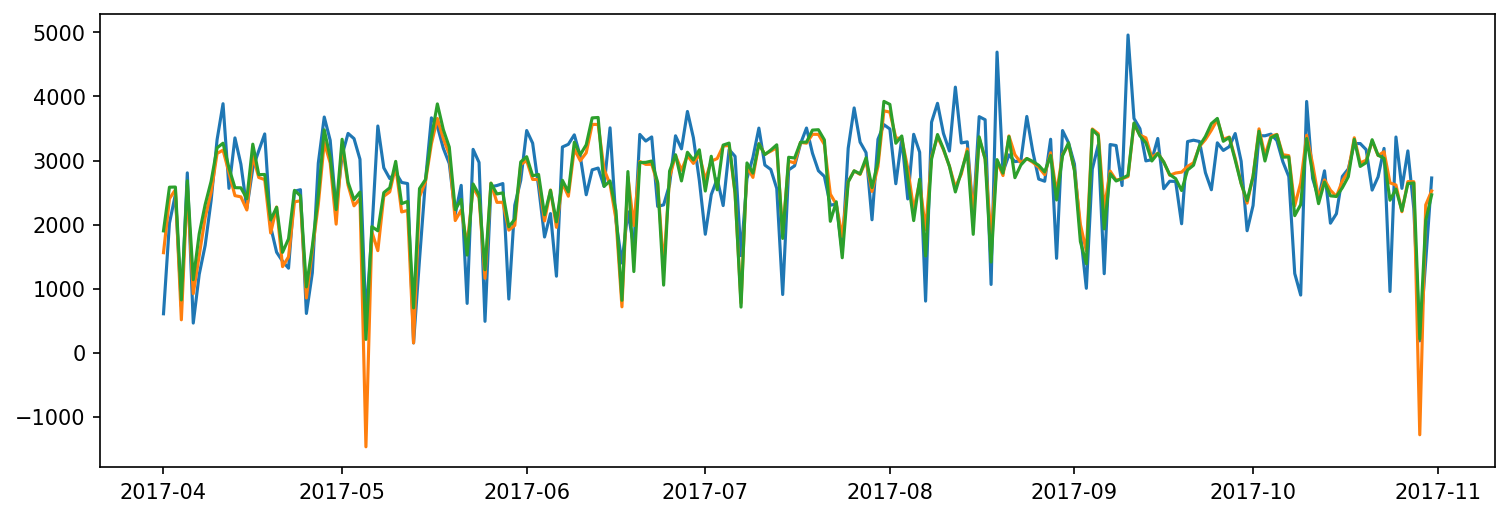

In [13]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(y)
plt.plot(X @ linear_theta)
plt.plot(np.exp(X @ poiss_theta))
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>Линейные модели чувствительны к виду категориальных признаков. Преобразуйте категориальные признаки с помощью One Hot Encoding и повторите шаги 3-4 из задания 1. Как изменилось качество моделей?</ul>
<p></p>
</div>

In [14]:
from functools import reduce
import operator

def prod(iterable):
    return reduce(operator.mul, iterable, 1)

In [15]:
df = pd.get_dummies(data.index.month).set_index(data.index)

In [16]:
df["y"] = data['BB_COUNT']

In [17]:
df.columns = [f"x{i}" for i in range(1, 8)] + ["y"]

In [18]:
df["t"] = [i for i in range(1, len(df)+1)]

In [19]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,y,t
Date,,,,,,,,,
2017-04-01,1,0,0,0,0,0,0,606,1
2017-04-02,1,0,0,0,0,0,0,2021,2
2017-04-03,1,0,0,0,0,0,0,2470,3
2017-04-04,1,0,0,0,0,0,0,723,4
2017-04-05,1,0,0,0,0,0,0,2807,5


In [20]:
def mae(data, var):
    return np.mean(np.abs(data["y"] - prod(var[i]**data[f"x{i}"] for i in range(1, 8))))

In [21]:
opfunc = lambda x: mae(df, x)

optimization = minimize(opfunc, [0 for i in range(8)])

print(optimization)
var = optimization.x

      fun: 604.9377021492363
 hess_inv: array([[   1.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,  512.27275095,  529.75581937,   -4.84225768,
         150.97877675, -544.52431873, -390.73366642,  432.14349507],
       [   0.        ,  529.75581937,  550.74118907,   -5.58561837,
         156.05496633, -566.36136144, -406.8285561 ,  448.86452614],
       [   0.        ,   -4.84225768,   -5.58561837,   33.94063844,
          23.25943649,   75.91958426,   63.26726564,    1.64820209],
       [   0.        ,  150.97877675,  156.05496633,   23.25943649,
          64.10065094, -107.78161795,  -70.76377354,  131.98125785],
       [   0.        , -544.52431873, -566.36136144,   75.91958426,
        -107.78161795,  734.08069629,  545.23629274, -449.25689452],
       [   0.        , -390.73366642, -406.8285561 ,   63.26726564,
         -70.76377354,  545.23629274,  408.45945264, -321.23639491],
 

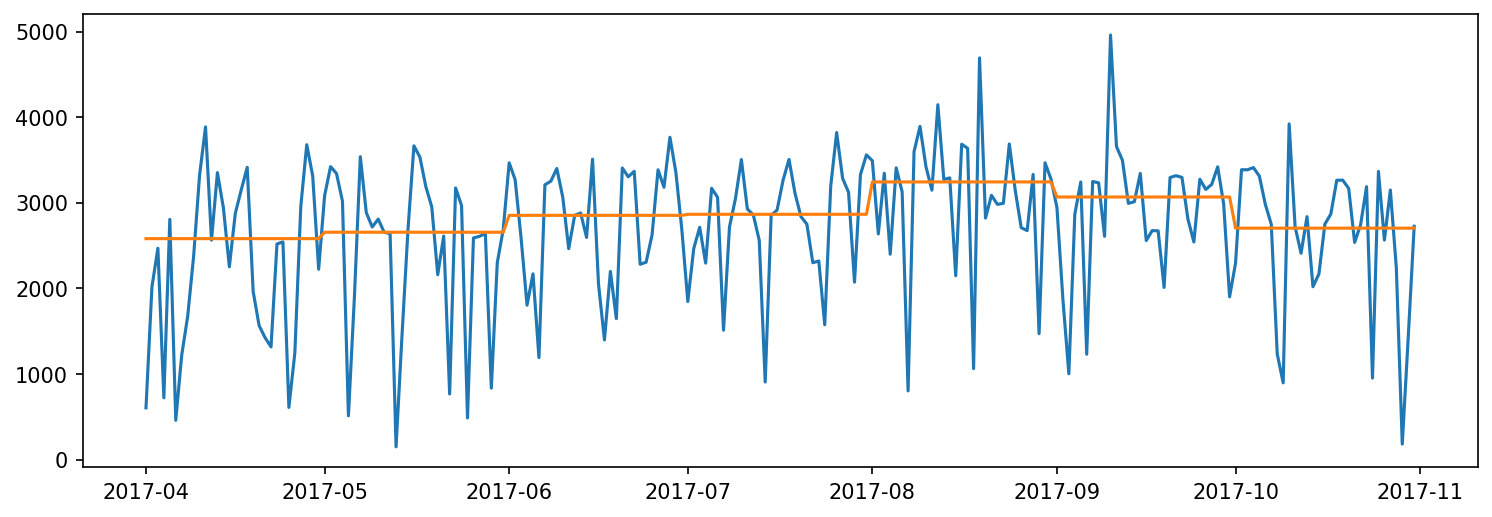

In [22]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(y)
plt.plot(prod(var[i]**df[f"x{i}"] for i in range(1, 8)))
plt.show()

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
<ul>Преобразуйте категориальные признаки с помощью Фурье-разложения и повторите шаги 3-4 из задания 1. Какого качества моделей удалось достичь?</ul>
<p></p>
</div>